In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"D:\ML Projects\BankNote_Authentication\BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'curtosis'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

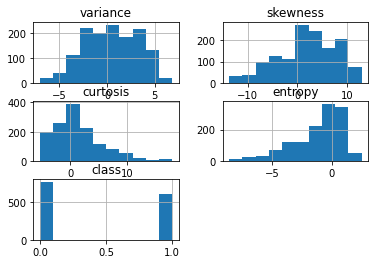

In [10]:
df.hist()

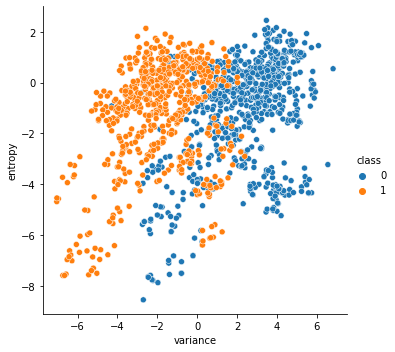

In [12]:
sns.relplot(x='variance',y='entropy',hue='class',data=df)

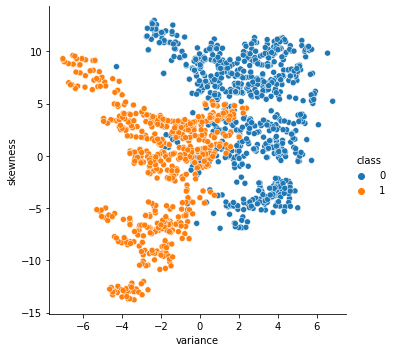

In [13]:
sns.relplot(x='variance',y='skewness',hue='class',data=df)

In [17]:
X = df.drop('class',axis = 1).values
y = df['class']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [32]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(max_leaf_nodes=1000)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=1000)

In [33]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9010851819840584

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9308509362936677

In [39]:
import pickle
pickle_out= open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()